# Import the Required Libraries

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt 

In [4]:
import random 

# defining the imshow() function

In [82]:
def imshow(title = 'image', image = None , size = 5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# reading original image and converting it to gray

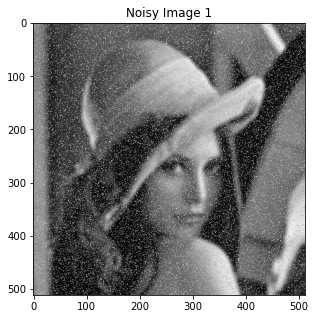

[[[219 219 219]
  [139 139 139]
  [143 143 143]
  ...
  [ 93  93  93]
  [219 219 219]
  [ 90  90  90]]

 [[137 137 137]
  [149 149 149]
  [139 139 139]
  ...
  [ 89  89  89]
  [ 88  88  88]
  [ 93  93  93]]

 [[144 144 144]
  [139 139 139]
  [141 141 141]
  ...
  [ 90  90  90]
  [221 221 221]
  [217 217 217]]

 ...

 [[120 120 120]
  [215 215 215]
  [218 218 218]
  ...
  [ 25  25  25]
  [ 24  24  24]
  [ 25  25  25]]

 [[117 117 117]
  [119 119 119]
  [119 119 119]
  ...
  [ 20  20  20]
  [ 26  26  26]
  [ 22  22  22]]

 [[117 117 117]
  [118 118 118]
  [122 122 122]
  ...
  [ 24  24  24]
  [ 23  23  23]
  [ 24  24  24]]]


In [170]:
noisy_image=cv2.imread("C:\\Users\\baksh\\Desktop\\noise1.jpg")
imshow('Noisy Image 1', noisy_image)
print(noisy_image)

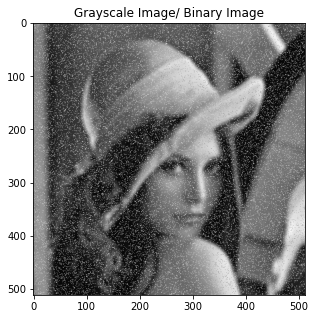

[[219 139 143 ...  93 219  90]
 [137 149 139 ...  89  88  93]
 [144 139 141 ...  90 221 217]
 ...
 [120 215 218 ...  25  24  25]
 [117 119 119 ...  20  26  22]
 [117 118 122 ...  24  23  24]]


In [175]:
# converting the image into gray scale
image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
imshow('Grayscale Image/ Binary Image',image_gray)
print(image_gray)

## Plotting Histogram of the Grayscaled/Binary Image

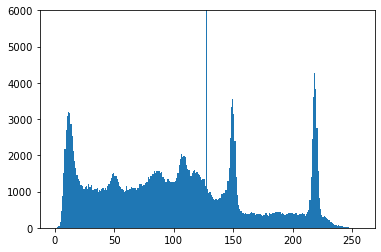

In [231]:
plt.hist(image_gray.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Denoising the Image

### 'fastNlMeansDenoising()'
This is a function in OpenCV that performs non-local means denoising on an imput image. Non-local means denoising is a type of filtering that uses similarity between patches while preserving image details.
This function takes input image as an argument and return denoised image. It has several parameters that can be tuned to adjust the denoising effect including:
##### 'src': the input image that is to be denoised
##### 'dst': the output denoised image 
##### 'h' : the parameter regulating filter strength.The higher the value of 'h', stronger will be the denoising in the resultant image, but this may also remove image details.
##### 'templateWindowSize': the size of the window used for searching similar patches. larger values result in stronger denoising but increases computational time 

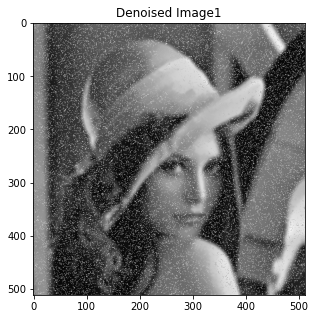

[[170 138 140 ...  93 219  90]
 [137 149 138 ...  89  88  93]
 [144 139 141 ...  90 221 217]
 ...
 [120 215 217 ...  24  23  25]
 [116 119 120 ...  22  22  22]
 [117 118 122 ...  22  22  22]]


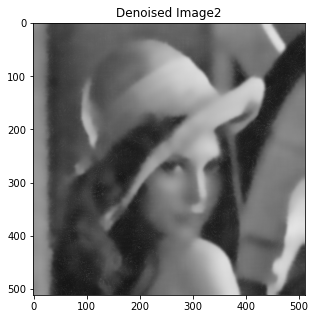

[[145 144 144 ... 100 104 100]
 [144 143 143 ...  98  96  96]
 [144 143 143 ... 101 103 102]
 ...
 [142 143 142 ...  37  37  38]
 [142 141 141 ...  36  38  38]
 [143 142 142 ...  37  37  37]]


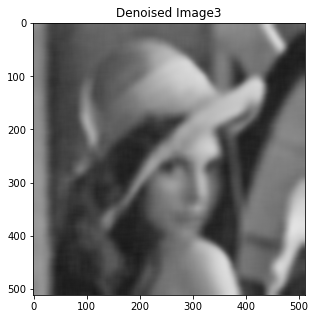

[[145 144 144 ...  99  98  99]
 [144 143 144 ...  99  98  98]
 [144 143 143 ... 101 100 100]
 ...
 [143 142 142 ...  41  42  43]
 [143 142 142 ...  41  42  43]
 [143 142 142 ...  41  42  43]]


In [91]:
image_denoised1=cv2.fastNlMeansDenoising(image_gray, None,h=10,templateWindowSize=4,searchWindowSize=21)
image_denoised2=cv2.fastNlMeansDenoising(image_gray, None,h=50,templateWindowSize=7,searchWindowSize=21)
image_denoised3=cv2.fastNlMeansDenoising(image_gray, None,h=100,templateWindowSize=20,searchWindowSize=21)
imshow('Denoised Image1', image_denoised1)
print(image_denoised1)
imshow('Denoised Image2', image_denoised2)
print(image_denoised2)
imshow('Denoised Image3', image_denoised3)
print(image_denoised3)

## Plotting Histogram of the Denoised Image 2 

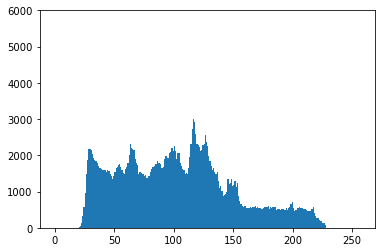

In [232]:
plt.hist(image_denoised2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Deblurring the Denoised Image i.e. image_denoised2 

## 'cv2.filter2D()'
This is an OpenCV function that applies a kernel filter to an image. Kernel Filters are commonly used for image processing tasks such as smoothning, sharpening, edge detection, and deblurring .
cv2.filter2D() takes the imput image that is to be filtered, the desired depth of the output image( -1 in case of the output image having the same depth as that of the input image) and then the kernel with which it is to be processed with. The output of the function is the filtered image.
#### There are many different types of kernels that can be used with 'cv2.filter2D()'. The kernels can be created manually using 
#### np.array()
#### cv2.getGaussianKernel()
#### cv2.getStructuringElement()

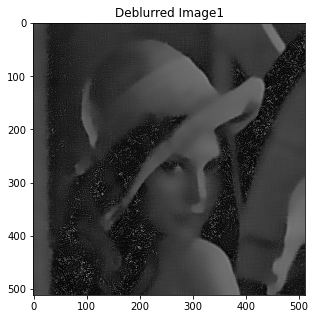

[[ 84  75  81 ...  58 104  66]
 [ 75  66  72 ...  24  12   8]
 [ 78  68  74 ...  66  90  82]
 ...
 [ 73  84  75 ...  18  14  21]
 [ 70  62  62 ...   9  26  24]
 [ 84  74  75 ...  18  16  12]]


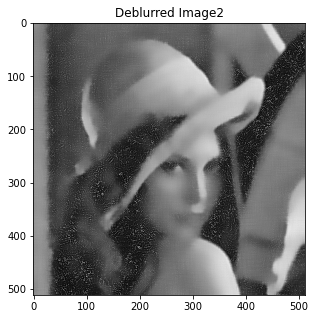

[[156 146 152 ... 107 155 115]
 [146 136 142 ...  72  59  55]
 [149 139 145 ... 116 141 132]
 ...
 [143 154 145 ...  36  33  40]
 [140 131 132 ...  27  45  43]
 [154 144 145 ...  37  35  31]]


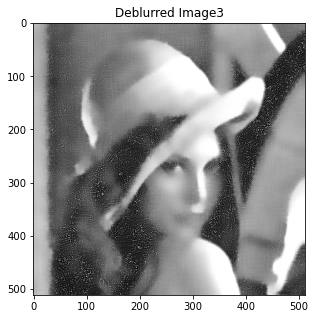

[[200 190 196 ... 138 187 146]
 [190 180 186 ... 102  89  85]
 [193 183 189 ... 147 173 164]
 ...
 [187 198 189 ...  47  44  51]
 [184 174 175 ...  38  56  54]
 [198 188 189 ...  48  46  42]]


In [104]:
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,8.99,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.3,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_denoised2,-1, kernel1)
image_filtered2 = cv2.filter2D(image_denoised2,-1, kernel2)
image_filtered3 = cv2.filter2D(image_denoised2,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print(image_filtered1)
imshow('Deblurred Image2', image_filtered2)
print(image_filtered2)
imshow('Deblurred Image3', image_filtered3)
print(image_filtered3)

## Plotting Histogram of the Deblurred Image 2

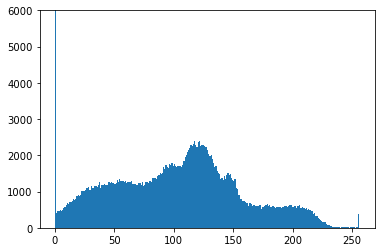

In [234]:
plt.hist(image_filtered2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Sharpening the Deblurred Image i.e. Deblurred Image 2 (image_filterred2)

To sharpen the image using OpenCV,a technique called unsharp masking is used. This technique involves subtracting a blurred version of the image from the original image to enhance the edges and details.
The unsharp masking initially convert the image into grayscale.Further Gaussian Blur is applied to the gray scale image using 'cv2.GaussinanBlur()' with the optimal kernel size and  sigma value.In the next step we subtract the blurred image from the grayscale image and cv2.addWeighted() filter to obtain high pass filtered image.
On merging the high-pass filtered image with the original image sharpened image is obtained.
The variable parameters for the image sharpening are 
1.the values of the kernel 
2.the value of sigma 
3.value of the weights for high-pass filter

## 'cv2.addWeighted()' 
This function in OpenCV performs a weighted addition of two images.The function has following syntax:
cv2.addWeighted(InputArray src1, double alpha, Input Array src2, double beta , double gamma , Output array dst , int dtype =-1)

##### 'src1' and 'src2' : this represents input arrays representing the two images that is to be added
##### 'alpha' and 'beta': these are the weights added to src1 and src2 respectively 
##### 'gamma': this is the scaler value added to the sum of src1 and src2 
##### 'dst': output array to store the result of the weighted addition
##### 'dtype' : this is the optional argument that specifies the output data type. If not specified the data type is determined automatically 

#### dst= arpha X src1 + beta X src2 + gamma 

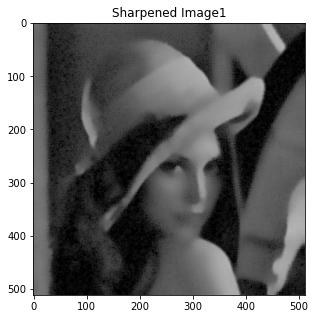

[[105 115 106 ...  72   8  54]
 [113 109 114 ...  58  47  44]
 [107 111 108 ...  65  33  46]
 ...
 [114  99 106 ...  25  26  30]
 [112 105 106 ...  22  22  26]
 [ 99 107 104 ...  26  28  25]]


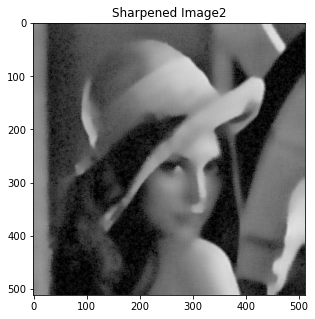

[[136 144 136 ...  93  39  77]
 [142 136 142 ...  72  59  55]
 [137 139 137 ...  88  61  72]
 ...
 [143 130 135 ...  32  33  38]
 [140 131 132 ...  27  31  35]
 [130 136 133 ...  33  35  31]]


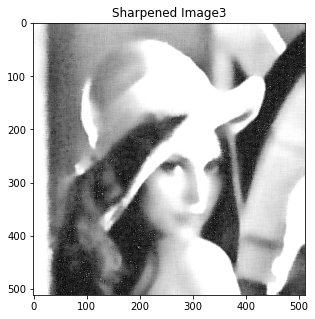

[[255 255 255 ... 189 178 180]
 [255 255 255 ... 137 112 104]
 [255 255 255 ... 192 188 191]
 ...
 [255 255 255 ...  64  63  74]
 [255 249 251 ...  51  72  74]
 [255 255 255 ...  66  66  59]]


In [156]:
blur= cv2.GaussianBlur(image_filtered2,(3,3),0)
image_sharp = cv2.subtract(image_filtered2, blur)
image_sharp1  = cv2.addWeighted(image_filtered2,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered2,1, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered2,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print(image_sharp1)
imshow("Sharpened Image2", image_sharp2)
print(image_sharp2)
imshow("Sharpened Image3", image_sharp3)
print(image_sharp3)

## Plotting Histogram of the Sharpened Image 2

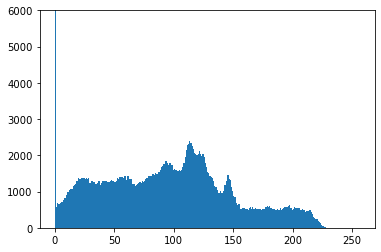

In [235]:
plt.hist(image_sharp2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Applying Histogram Equalization to Sharpened Image2 i.e. image_sharp2

histogram Equlaization is the method for enhancing the contrast of an image by spreadinfg the intensity values over a wider range. 
### 'cv2.equalizeHist()'
This function is used to perfom histogram equalization on gray scale image. The method only works for gray scale images. In case of colored images, color channels are needed to be split into three and equalization is needed to be performed on each color seperately and later the channels are required to be merged together. Fuctions like cv2.split() and cv2.merge are used to accomplish histogram equalization for colored images.

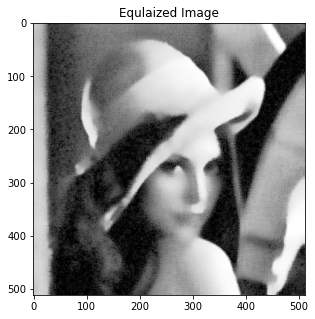

[[201 209 201 ... 122  45  96]
 [207 201 207 ...  90  73  67]
 [202 204 202 ... 113  75  90]
 ...
 [208 193 200 ...  36  38  44]
 [205 194 196 ...  30  35  40]
 [193 201 197 ...  38  40  35]]


In [161]:
equ = cv2.equalizeHist(image_sharp2)
imshow('Equlaized Image',equ)
print(equ)

## Plotting Histogram of Equalized Image 

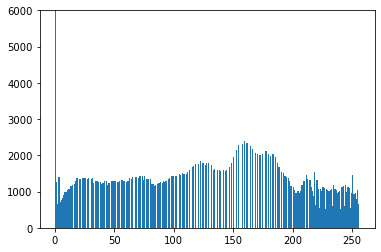

In [236]:
plt.hist(equ.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Deblurring of the Histogram Equalized Image using Bilateral Filter
OpenCV provides several deblurring algorithms that can be used to remove blur from the images. Some of the deblurring filters are as mentioned:
#### cv2.deblurWiener()
#### cv2.deconvolve()
#### cv2.bilateralFilter()

Bilateral Filtering is a non-linear filtering algorithm used for image processing, especially for denoising, smoothning and edge detection. Unlike linear Filters, which apply fixed convolution kernel to each pixel in the image, bilateral filtering aplies a kernel that varies depending on the similarity of neighboring piixels.
The bilateral filter kernels consists 2 componet namely, the spatial component and the range component. The spatial component that determines the weighting of neighboring pixels based on their distance from the center pixel, and the range component is based on the similarity of their intensity values.

#### 'd': this defines the diameter of the pixel neighbourhood
#### 'sigmaColor': this defines the standard deviation off the range 
#### 'sigmaSpace': components of the filter 

'sigma Color' and 'sigma Space' are the parameters that control the amount of smoothning applied to the image. Increasing the value might lead to more smoothning of the image and less of information available to us

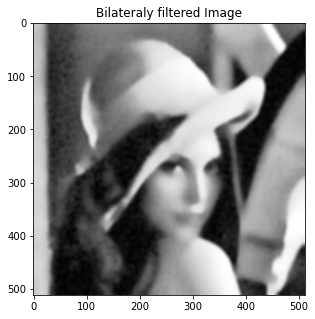

[[204 204 203 ...  96  93  91]
 [203 204 204 ...  97  94  93]
 [204 204 204 ... 101  97  97]
 ...
 [200 200 201 ...  32  31  30]
 [200 200 201 ...  35  34  34]
 [200 200 201 ...  35  36  37]]


In [249]:
image_bfiltered = cv2.bilateralFilter(equ, d=9, sigmaColor = 1000, sigmaSpace = 200)
imshow('Bilateraly filtered Image', image_bfiltered)
print(image_bfiltered)

## Plotting Histogram of Bilaterally Filtered Image 

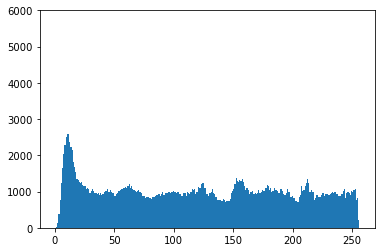

In [248]:
plt.hist(image_bfiltered.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Enhancing Edges of Bilateraly Filtered Image using Erosion and Closing 

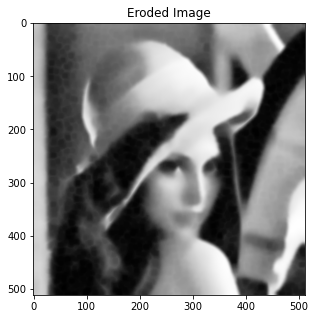

[[203 203 203 ...  91  91  91]
 [203 203 203 ...  91  91  91]
 [203 203 203 ...  91  91  91]
 ...
 [199 199 199 ...  27  27  27]
 [199 199 199 ...  29  29  29]
 [200 200 200 ...  30  30  30]]


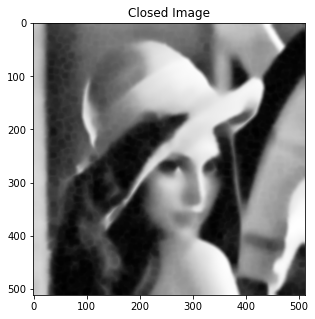

In [250]:
kernel =  np.ones((5,5), np.uint8)

image_erode = cv2.erode(image_bfiltered, kernel, iterations = 1)
imshow('Eroded Image', image_erode)
print(image_erode)

image_closed = cv2.morphologyEx(image_erode, cv2.MORPH_CLOSE, kernel)
imshow('Closed Image',image_closed)

## Plotting Histogram of Closed Image(Dilated + Eroded )

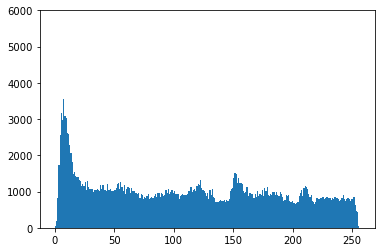

In [239]:
plt.hist(image_closed.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# Pixel Enhancemnet of Eroded Image 

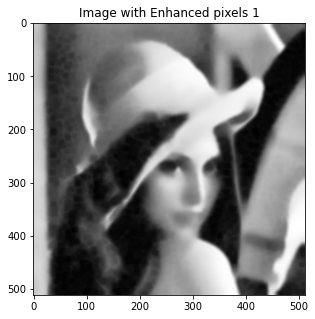

[[204 204 204 ...  92  92  92]
 [204 204 204 ...  92  92  92]
 [204 204 204 ...  92  92  92]
 ...
 [200 200 200 ...  28  28  28]
 [200 200 200 ...  30  30  30]
 [201 201 201 ...  31  31  31]]


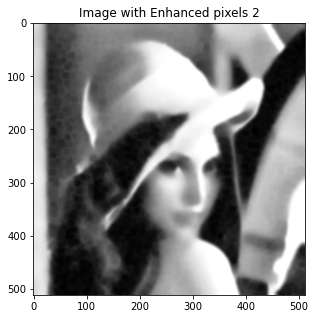

[[224 224 224 ... 101 101 101]
 [224 224 224 ... 101 101 101]
 [224 224 224 ... 101 101 101]
 ...
 [220 220 220 ...  31  31  31]
 [220 220 220 ...  33  33  33]
 [221 221 221 ...  34  34  34]]


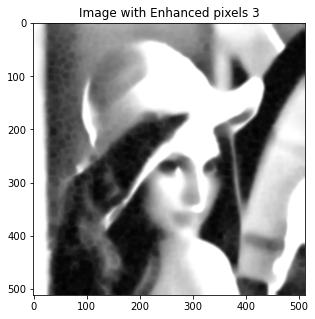

[[255 255 255 ... 120 120 120]
 [255 255 255 ... 120 120 120]
 [255 255 255 ... 120 120 120]
 ...
 [255 255 255 ...  37  37  37]
 [255 255 255 ...  40  40  40]
 [255 255 255 ...  41  41  41]]


In [251]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(image_closed, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(image_closed, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(image_closed , alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print(image_enhanced1)
imshow('Image with Enhanced pixels 2', image_enhanced2)
print(image_enhanced2)
imshow('Image with Enhanced pixels 3', image_enhanced3)
print(image_enhanced3)

## Plotting Histogram of Image with Enhanced Pixels 1

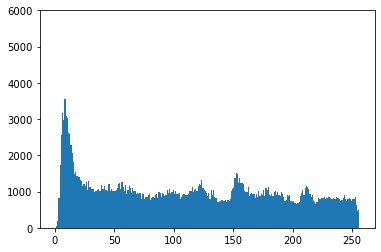

In [252]:
plt.hist(image_enhanced1.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

# HAAR CASCADE CLASSIFIER for decting Frontal-Face and Eyes of the Enhanced Image

C:\Users\baksh\AppData\Local\Temp\ipykernel_31132\4252776676.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_31132\4252776676.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


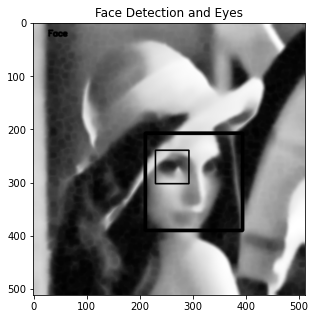

In [223]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_enhanced1,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_enhanced1, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_enhanced1, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= image_enhanced1[y:y+h,x:x+w]
    roi_color=image_enhanced1[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_enhanced1)

In [221]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_gray,1.3,minNeighbors=5,minSize=(5,5)) 


for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_gray, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_gray, (x,y), (x+w,y+h),(127,0,255),5)
    roi_gray= image_gray[y:y+h,x:x+w]
    roi_color=image_gray[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        
if face == ():
    print("No faces found !!!!!")   
else:
    imshow('Face Detection and Eyes',image_gray)

No faces found !!!!!
